---
# SVM

Support vector machines (SVMs) are a set of supervised learning methods used for __classification__, __regression__ and outliers detection.

Let's start with a classification example and look at the arguments of the classifier [SVM Classifier Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- **C:** Regularization parameter (set as default at 1.0). The strength of the regularization is inversely proportional to C. Must be strictly positive.

- **kernel:** Specifies the kernel type to be used in the algorithm. `linear` will use a simple linear kernel, `rbf` (default) will apply the kernel trick seen from theory slides. Other kernels not covered in theory are also available and you can create your own kernel and use it here as well.

- **gamma:** Hyperparameter value used only with kernels `rbf`, `poly` and `sigmoid`. Set as default to `"scale"` which uses the following formula 1 / (n_features * X.var()) as value of gamma. if `gamma="auto"`, uses 1 / n_features. You can also pass a custom gamma value as float, `gamma=0.1` is also considered to be a good default value.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [4]:
!gdown "1r7ZqEH9kqsoNGW3hFumWetLUoTMMbLiq"
dataset = pd.read_csv('data_SVM.csv')
dataset.head()

Downloading...
From: https://drive.google.com/uc?id=1r7ZqEH9kqsoNGW3hFumWetLUoTMMbLiq
To: /content/data_SVM.csv
100% 10.9k/10.9k [00:00<00:00, 31.4MB/s]


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

We will use as features `Age` and `EstimatedSalary`. Our target for prediction will be `Purchased`.

In [ ]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

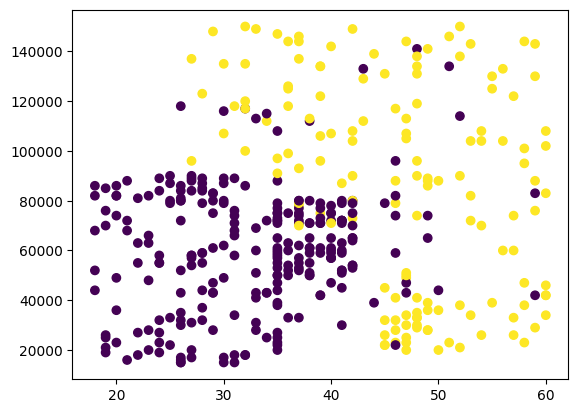

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(C=1, kernel='linear', random_state=1)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [ ]:
# Now it's time to use our trained model on unseen samples
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Using this formula we can measure the % of correctly classified samples
# We will see later better ways to measure our classifier perfomance
accuracy = sum(y_pred == y_test) / len(y_pred)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 90.00%


In [ ]:
# Let's check the accuracy on training set
y_pred_train = classifier.predict(X_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 82.33%


**Advanced Tip:** You can use the code below to analyze further how our SVM Model with Linear Kernel is classifying your data. This snippet will display the model decision boundaries.

<ipython-input-18-2792bdfe5768>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


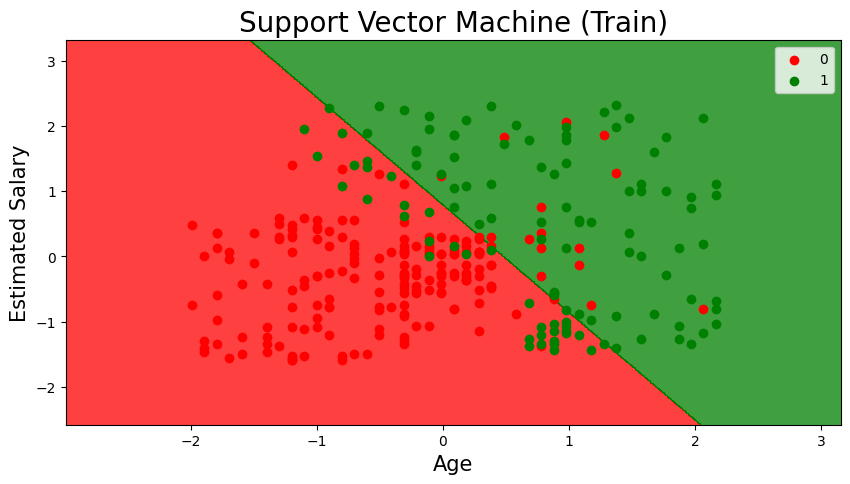

In [ ]:
from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min()-1, stop=X_Set[:, 0].max()+1, step=0.01),
    np.arange(start=X_Set[:, 1].min()-1, stop=X_Set[:, 1].max()+1, step=0.01)
)

plt.figure(figsize=(10,5))
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('Support Vector Machine (Train)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Estimated Salary', fontsize=15)
plt.legend()
plt.show()

<ipython-input-19-c0a943fc6014>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


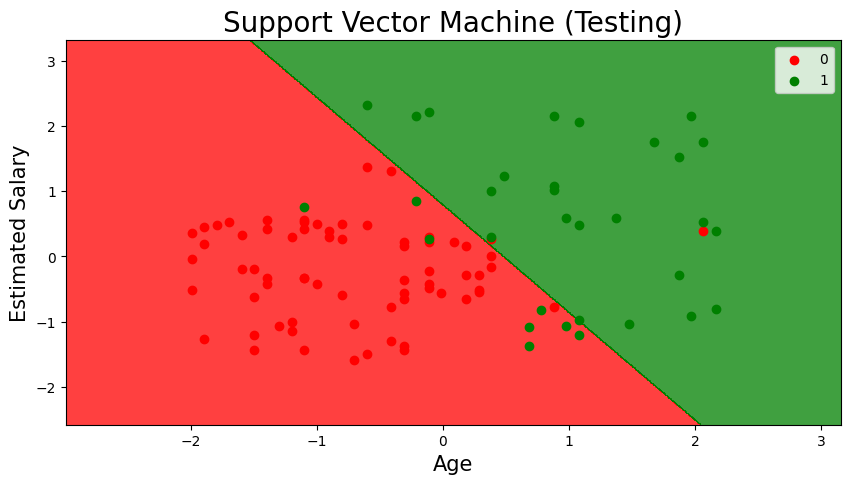

In [ ]:
X_Set, Y_Set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min()-1, stop=X_Set[:, 0].max()+1, step=0.01),
    np.arange(start=X_Set[:, 1].min()-1, stop=X_Set[:, 1].max()+1, step=0.01))

plt.figure(figsize=(10,5))
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(['red', 'green'])
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )

plt.title('Support Vector Machine (Testing)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Estimated Salary', fontsize=15)
plt.legend()
plt.show()

---
## Kernel SVM

Let's see an example of SVM with another kernel.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame([iris.target_names[i] for i in iris.target], columns=['variety'])


In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Using Poly kernel

In [ ]:
from sklearn.svm import SVC

#svclassifier = SVC(kernel='rbf', gamma='auto', degree=8, random_state=0)
svclassifier = SVC(kernel='poly', gamma='auto', degree=8, random_state=0)
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=8, gamma='auto', kernel='poly', random_state=0)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
y_test_np = y_test.values.flatten()

accuracy = sum(y_pred == y_test_np) / len(y_pred)
print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 90.00%


---
## TO DO

We've just seen an example of a SVM Classifier, now it's your turn to investigate and play around with an [SVM Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

---
## Reference

- [Scikit-learn: Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#svm)
- [Datacamp: Support Vector Machines with Scikit-learn Tutorial](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)
